In [3]:
# Imports
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

In [4]:
# data load
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i in range (len (sequences)):
        for j in range (len (sequences [i])):
            results [i] [sequences [i] [j]] = 1.
    return results


In [25]:
# Data Prepro
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [26]:
# Validation set Split 
print(x_train.shape)
x_train,x_val ,y_train, y_val = train_test_split(x_train,y_train,test_size = 0.3)
print(x_train.shape)

(25000, 10000)
(17500, 10000)


In [34]:
# Model Settings
model = keras.Sequential(keras.layers.Dense(16,activation = 'relu' ,input_shape = (x_train.shape[1],)))
model.add(keras.layers.Dense(16,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))


# Optimizer Settings 
rms = tf.keras.optimizers.RMSprop()

model.compile(loss = 'binary_crossentropy' , optimizer = 'rmsprop' , metrics=['acc'])

In [35]:
# Train the model

def train(model):
    with tf.device('/device:GPU:0'):
       history = model.fit(x_train,y_train,
                        epochs = 20,
                        batch_size = 512,
                        validation_data = (x_val,y_val)
                        )
    return history

In [36]:
# Train the model 
history = train(model)

Epoch 1/20
35/35 [==============================] - 2s 29ms/step - loss: 0.4716 - acc: 0.8081 - val_loss: 0.3741 - val_acc: 0.8509
Epoch 2/20
35/35 [==============================] - 1s 18ms/step - loss: 0.2734 - acc: 0.9076 - val_loss: 0.2841 - val_acc: 0.8908
Epoch 3/20
35/35 [==============================] - 1s 18ms/step - loss: 0.2061 - acc: 0.9284 - val_loss: 0.3022 - val_acc: 0.8764
Epoch 4/20
35/35 [==============================] - 1s 17ms/step - loss: 0.1642 - acc: 0.9443 - val_loss: 0.3046 - val_acc: 0.8785
Epoch 5/20
35/35 [==============================] - 1s 17ms/step - loss: 0.1352 - acc: 0.9561 - val_loss: 0.2938 - val_acc: 0.8847
Epoch 6/20
35/35 [==============================] - 1s 17ms/step - loss: 0.1122 - acc: 0.9641 - val_loss: 0.3179 - val_acc: 0.8809
Epoch 7/20
35/35 [==============================] - 1s 18ms/step - loss: 0.0950 - acc: 0.9704 - val_loss: 0.3589 - val_acc: 0.8729
Epoch 8/20
35/35 [==============================] - 1s 17ms/step - loss: 0.0784 - a

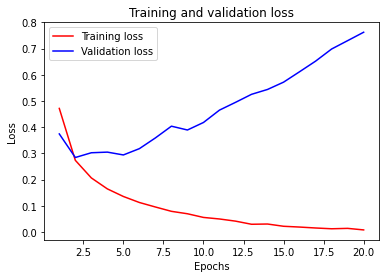

In [37]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

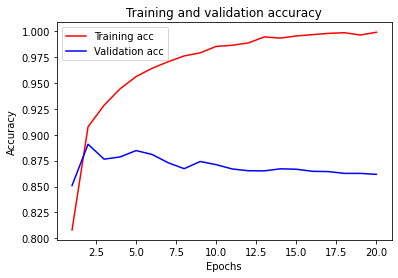

In [38]:
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()